# Dataset

Examin and preprocess the dataset.

In [16]:
# imports
import pandas as pd # it has functions for analyzing, cleaning, exploring, and manipulating data
import matplotlib.pyplot as plt # for creating graphs and visualizations
from sklearn.model_selection import train_test_split, GridSearchCV # import of modules for dividing the dataset
from sklearn.tree import DecisionTreeClassifier # importing Decision Tree classifier
from sklearn.metrics import accuracy_score, recall_score, f1_score # import of metrics for model evaluation
from sklearn.ensemble import RandomForestClassifier # import of ensemble models
from sklearn.neighbors import KNeighborsClassifier # importing KNN classifier
import warnings # management of warnings
warnings.filterwarnings('ignore')

Create the dataset variable.

In [17]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Some columns are not necessary in our project (id, Profession, Work Pressure, Job Satisfaction). Let's remove them from the `df` variable. 

In [18]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['Profession'], axis=1, inplace=True)
df.drop(['Work Pressure'], axis=1, inplace=True)
df.drop(['Job Satisfaction'], axis=1, inplace=True)

In [19]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In our dataset we have some columns with categorical data, but for machine learning process we will use algotithms that require numeric data. 

In [20]:
def convert_column_to_numeric(df, col):
    # create a dict for 'Yes' and 'No' values
    value_to_number = {}
    if 'Yes' in df[col].values and 'No' in df[col].values:
        value_to_number['Yes'] = 1
        value_to_number['No'] = 0

    # manage 'Healthy', 'Moderate', 'Unhealthy' values separately
    if 'Healthy' in df[col].values:
        value_to_number['Healthy'] = 2
    if 'Moderate' in df[col].values:
        value_to_number['Moderate'] = 1
    if 'Unhealthy' in df[col].values:
        value_to_number['Unhealthy'] = 0

    # create a dict
    unique_values = df[col].unique()
    for idx, value in enumerate(unique_values):
        if value not in value_to_number:  # ignore already mapped values
            value_to_number[value] = len(value_to_number)

    # convert column
    df[col] = df[col].map(value_to_number)

    return df, value_to_number

In [21]:
# convert categorical data
convert_column_to_numeric(df, 'Gender') # Male 0, Female 1
convert_column_to_numeric(df, 'Dietary Habits')
convert_column_to_numeric(df, 'Degree')
convert_column_to_numeric(df, 'Have you ever had suicidal thoughts ?')
convert_column_to_numeric(df, 'Family History of Mental Illness')
convert_column_to_numeric(df, 'City')

df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,0,5.0,8.97,2.0,5-6 hours,2,0,1,3.0,1.0,0,1
1,1,24.0,1,2.0,5.90,5.0,5-6 hours,1,1,0,3.0,2.0,1,0
2,0,31.0,2,3.0,7.03,5.0,Less than 5 hours,2,2,0,9.0,1.0,1,0
3,1,28.0,3,3.0,5.59,2.0,7-8 hours,1,3,1,4.0,5.0,1,1
4,1,25.0,4,4.0,8.13,3.0,5-6 hours,1,4,1,1.0,1.0,0,0


For Sleep Duration column we apply a different conversion.

In [22]:
# convert from string to float
convert = {
    '5-6 hours': 5.5,
    'Less than 5 hours': 4.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 8.5,
    'Others': 0
}

df['Sleep Duration'] = df['Sleep Duration'].map(convert)
df['Sleep Duration'] = df['Sleep Duration'].astype(float)
df['Sleep Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27901 entries, 0 to 27900
Series name: Sleep Duration
Non-Null Count  Dtype  
--------------  -----  
27901 non-null  float64
dtypes: float64(1)
memory usage: 218.1 KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  int64  
 3   Academic Pressure                      27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Sleep Duration                         27901 non-null  float64
 7   Dietary Habits                         27901 non-null  int64  
 8   Degree                                 27901 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

We check if we have any empty cell in our data and get rid of them.

In [24]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [25]:
df = df.dropna()
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [26]:
unique = df.nunique()
print(unique)

Gender                                     2
Age                                       34
City                                      52
Academic Pressure                          6
CGPA                                     332
Study Satisfaction                         6
Sleep Duration                             5
Dietary Habits                             4
Degree                                    28
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64


# Machine Learing

We will create some machine learning models that will classify our students if they have depression or not. Our classifiers will be:
* Decision Tree
* Random Forest
* KNN

In [27]:
# split the data
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Train Decision Tree Classifier

In [28]:
# create parameters
params = {'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': [None, 5, 10, 15, 20],
          'min_samples_split': [2, 4, 5, 7, 9],
          'min_samples_leaf': [1, 2, 4, 5, 6]}

# train a GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5).fit(X_train, y_train)

# train Decision Tree classifier
dtc = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = dtc.predict(X_test)

# evaluate its performance
dtc_accuracy = accuracy_score(y_test, y_hat)
dtc_recall = recall_score(y_test, y_hat, average='weighted')
dtc_f1 = f1_score(y_test, y_hat, average='weighted')

# print the performance results
print(f'''Accuracy Score: {dtc_accuracy}
Recall Score: {dtc_recall}
F1 Score: {dtc_f1}''')

Accuracy Score: 0.8245519713261649
Recall Score: 0.8245519713261649
F1 Score: 0.8250522601063395


Random Forest Classifier

In [29]:
# train Random Forest Classifier
rfc = RandomForestClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = rfc.predict(X_test)

# evaluate its performance
rfc_accuracy = accuracy_score(y_test, y_hat)
rfc_recall = recall_score(y_test, y_hat, average='weighted')
rfc_f1 = f1_score(y_test, y_hat, average='weighted')

# print the performance results
print(f'''Accuracy Score: {rfc_accuracy}
Recall Score: {rfc_recall}
F1 Score: {rfc_f1}''')

Accuracy Score: 0.8354838709677419
Recall Score: 0.8354838709677419
F1 Score: 0.8339606856306848


K-Nearest Neighbors Classifier

In [30]:
# Define the parameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}

# Perform GridSearchCV to find the best parameters for KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5).fit(X_train, y_train)

# Train the KNN classifier with the best parameters found
knn = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)

# Evaluate the performance of the KNN model
knn_accuracy = accuracy_score(y_test, y_hat_knn)  # Calculate accuracy
knn_recall = recall_score(y_test, y_hat_knn, average='weighted')  # Calculate recall
knn_f1 = f1_score(y_test, y_hat_knn, average='weighted')  # Calculate F1 score

# Print the performance results
print(f'''KNN Classifier Performance:
Accuracy Score: {knn_accuracy}
Recall Score: {knn_recall}
F1 Score: {knn_f1}''')

KNN Classifier Performance:
Accuracy Score: 0.7987455197132617
Recall Score: 0.7987455197132617
F1 Score: 0.7958081382865043


For selecting the best model we will create a graph and see performance evaluation.

In [31]:
# create scores dictionary
scores = {'Decision Tree': [dtc_accuracy, dtc_recall, dtc_f1],
          'Random Forest': [rfc_accuracy, rfc_recall, rfc_f1],
          'K-Nearest Neighbors': [knn_accuracy, knn_recall, knn_f1]}

# create the data frame and show it
scores_table = pd.DataFrame(scores)
scores_table.index = ['Accuracy', 'Recall', 'F1']
scores_table.head()

,Decision Tree,Random Forest,K-Nearest Neighbors
Accuracy,0.824552,0.835484,0.798746
Recall,0.824552,0.835484,0.798746
F1,0.825052,0.833961,0.795808


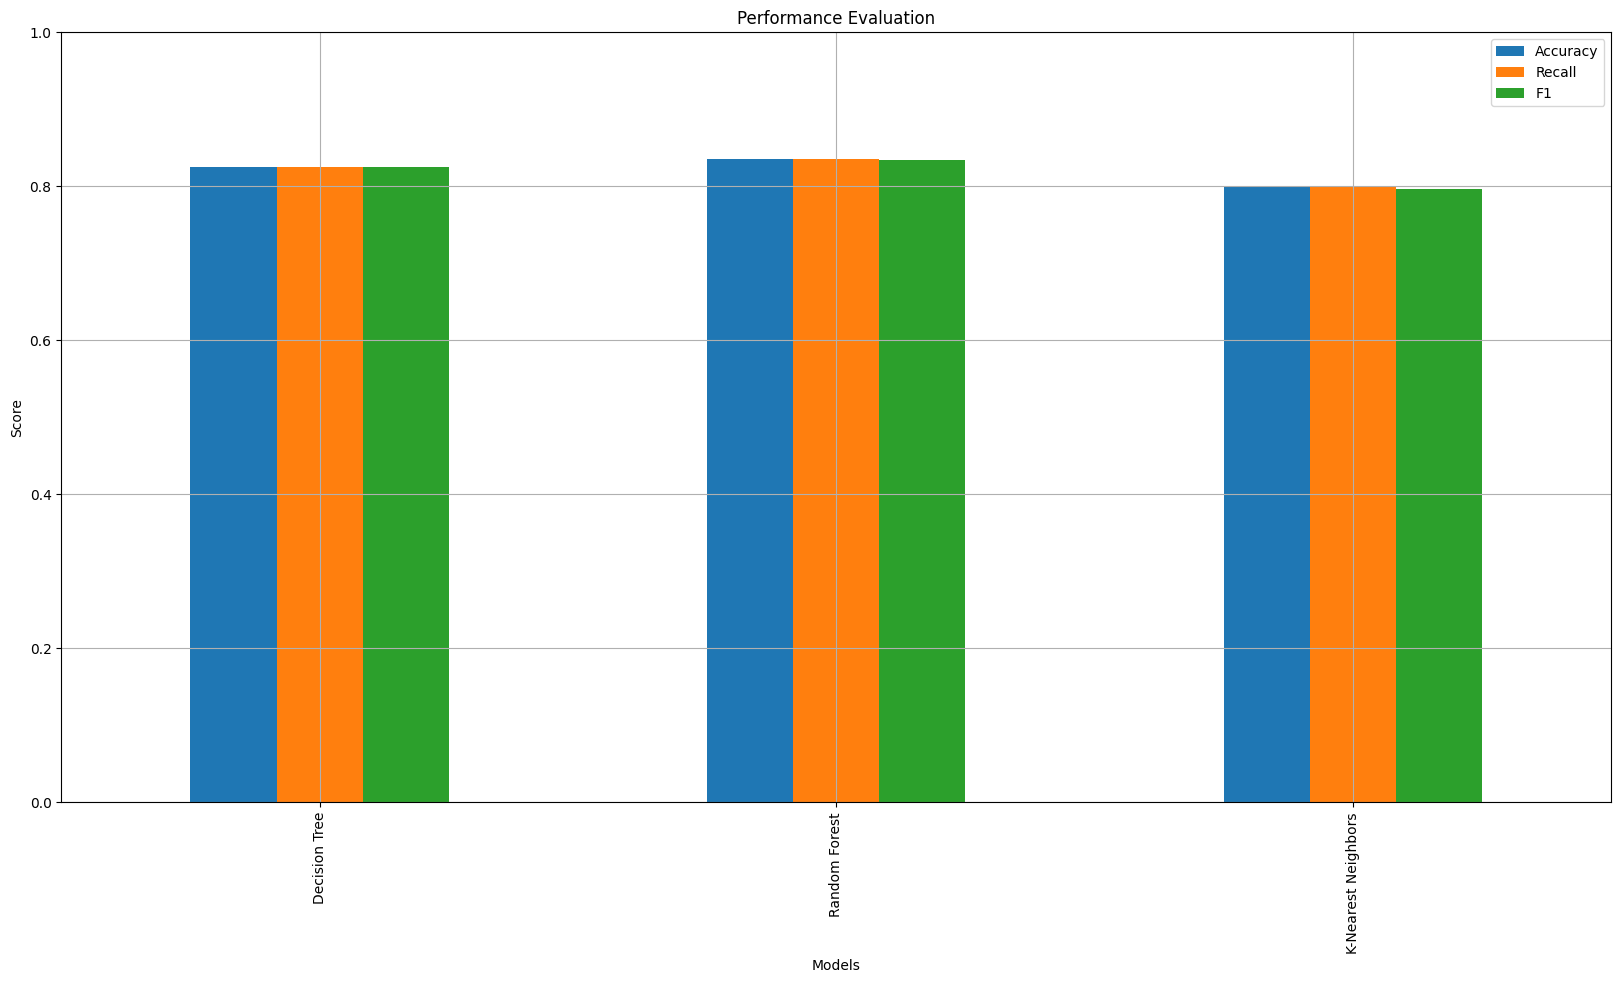

In [32]:
# create and show the graph
scores_table.T.plot(kind='bar', figsize=(20, 10))
plt.title('Performance Evaluation')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim([0,1])
plt.grid()
plt.show()

From results, we can see that we generally have scores above 80%. Our models are successful generally. The best performance index is Random Forest so we will select it for our project.